In [1]:
addprocs(2) # vary number of concurrent processes here
@everywhere include("../src/TemporalInstanton.jl")
@everywhere include("../src/mat2tmpinst.jl")
@everywhere using TemporalInstanton

In [2]:
include("../src/TemporalInstanton.jl")
# include("../src/mat2tmpinst.jl")
using TemporalInstanton

In [4]:
# compile everything with this run:
inputData = load_rts96_data(return_as_type=true);
# Thermal model parameters:
inputData.Tamb = 35. # C
inputData.T0 = 60. #46. # initial line steady-state temp

inputData.time_values = 0:30:300 # five minutes in 30-sec steps
inputData.int_length = 300. # seconds = 5 min
Gp,Dp,Rp = inputData.G0,inputData.D0,inputData.R0
inputData.G0 = [0.7*Gp;0.7*Gp;0.7*Gp;0.7*Gp;0.7*Gp;0.7*Gp]
inputData.D0 = [0.9*Dp;0.9*Dp;0.9*Dp;0.9*Dp;0.9*Dp;0.9*Dp]
inputData.R0 = [Rp;1.1*Rp;1.2*Rp;1.3*Rp;1.4*Rp;1.5*Rp]

@time outputData = solve_temporal_instanton(inputData);

n = length(inputData.k)
nr = length(inputData.Ridx)
T = convert(Int64,length(inputData.G0)/n)
# outputData = process_instanton_results(results,n,nr,T,return_as_type=true);

sort(outputData.score)

r=0 check: 	removing 1 lines
  0.317502 seconds (28.88 k allocations: 6.715 MB)


104-element Array{Tuple{Float64,Int64},1}:
 (0.26378773419958684,25)
 (0.3273167532507281,30) 
 (1.288611674256682,69)  
 (2.204151556954898,89)  
 (2.322973917239782,118) 
 (2.423161346183255,64)  
 (4.678758530519269,42)  
 (4.865240026220507,102) 
 (4.899167747804473,31)  
 (5.678275094502619,80)  
 (5.938614653209759,1)   
 (6.439172215205485,100) 
 (6.460889177817894,62)  
 ⋮                       
 (178.08526359412195,99) 
 (303.00092576609785,103)
 (370.6118288841732,66)  
 (370.61182888417324,67) 
 (391.3068338497761,33)  
 (428.94292075306925,40) 
 (923.9909510647764,72)  
 (979.1908687265648,117) 
 (1319.8492876743157,79) 
 (1390.0600720225423,110)
 (1967.2796760965161,74) 
 (1967.2796760965189,73) 

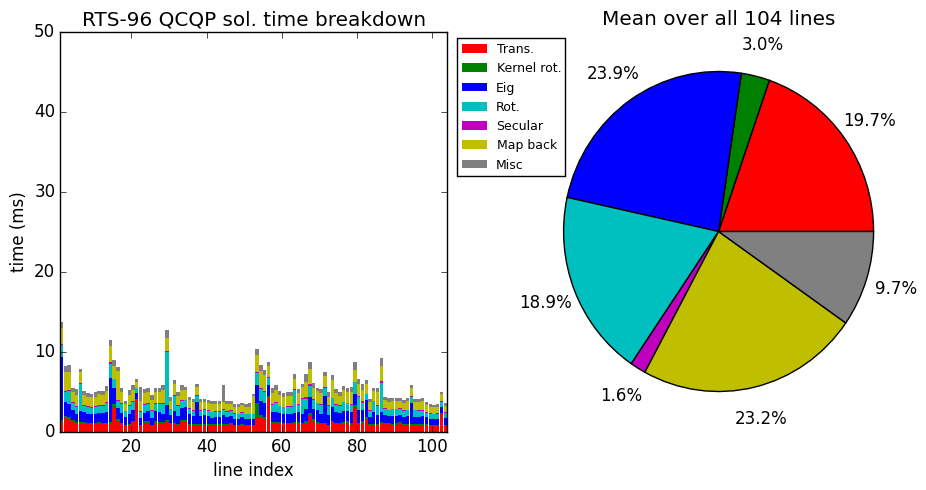

In [6]:
using PyPlot
PyPlot.svg(true)

t = load("../data/timing.jld")["timeVecs"]

tTrans    = [ti[1] for ti in t]*1e3
tKern     = [ti[2] for ti in t]*1e3
tEig      = [ti[3] for ti in t]*1e3
tRot      = [ti[4] for ti in t]*1e3
tSec      = [ti[5] for ti in t]*1e3
tMap      = [ti[6] for ti in t]*1e3
misc = outputData.linetimes*1e3 - (tMap+tSec+tRot+tEig+tKern+tTrans)

xvals = collect(1:length(tTrans))

fig = figure(figsize=(11,5))
subplot(1,2,1)
title("RTS-96 QCQP sol. time breakdown")
axis([1;length(xvals);0;50])
xlabel("line index")
ylabel("time (ms)")

bar(xvals, tTrans, color = "r", linewidth=0, width=0.9)
bar(xvals, tKern,  color = "g", bottom = tTrans, linewidth=0, width=0.9)
bar(xvals, tEig,   color = "b", bottom = tKern+tTrans, linewidth=0, width=0.9)
bar(xvals, tRot,   color = "c", bottom = tEig+tKern+tTrans, linewidth=0, width=0.9)
bar(xvals, tSec,   color = "m", bottom = tRot+tEig+tKern+tTrans, linewidth=0, width=0.9)
bar(xvals, tMap,   color = "y", bottom = tSec+tRot+tEig+tKern+tTrans, linewidth=0, width=0.9)
bar(xvals, misc,   color = "k", bottom = tMap+tSec+tRot+tEig+tKern+tTrans, linewidth=0,width=0.9, alpha=0.5)

labels = ["Trans.";
    "Kernel rot.";
    "Eig";
    "Rot.";
    "Secular";
    "Map back";
    "Misc"]

legend(labels,loc=1,ncol=1,fontsize=9,
bbox_to_anchor=(1.32, 1.0))

subplot(1,2,2)
title("Mean over all 104 lines")
sizes = [mean(tTrans);
    mean(tKern);
    mean(tEig);
    mean(tRot);
    mean(tSec);
    mean(tMap);
    mean(misc)]
scale!(sizes,1/sum(sizes))

colors = ["r";
    "g";
    "b";
    "c";
    "m";
    "y";
    "gray"]

pie(sizes, colors=colors, autopct="%1.1f%%", pctdistance=1.2)
# tight_layout()
# savefig("../images/2016-01-19-timing-analysis-split-null-basis.pdf")